<a name="prob_b"></a>    
**problem coding B**:

1.  Now solve the following test equation by both the midpoint and
    Heun’s method and compare. $$f(y,t) = t - y  + 1.0$$ Choose two sets
    of initial conditions and investigate the behaviour.

2.  Is there any difference between the two methods when applied to
    either problem? Should there be? Explain by analyzing the steps
    that each method is taking.


I rewrote the derivative as follows:

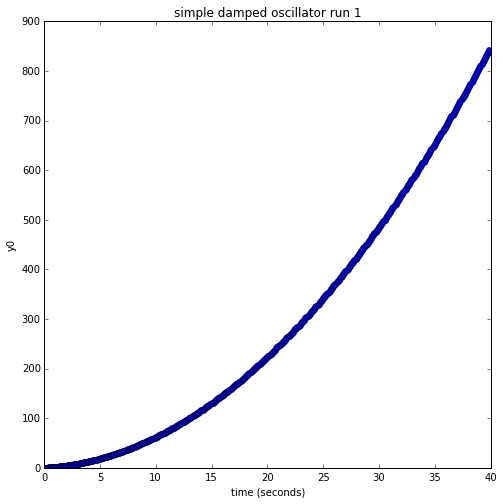

In [26]:
%matplotlib inline
import numpy as np
import json
from numlabs.lab4.example.test import read_init
from matplotlib import pyplot as plt
#
# specify the derivs function
#
def derivsB(coeff,y,t):
#    f = np.empty_like(y) #2 element vector for derivative

    f= - coeff.c1*y + coeff.c2*t + 1
    return f

def midpoint4(coeff, y, derivsB,t):
    ynew = y + coeff.dt*derivsB(coeff,y,t + (0.5 * coeff.dt * derivsB(coeff,y,t)),)
    return ynew

def heun2(coeff, y, derivs,t):
    k1 = coeff.dt * derivsB(coeff,y,t)
    k2 = coeff.dt * derivsB(coeff,y + ((2.0/3.0) * k1),t)
    ynew = y + (1.0/4.0) * (k1) + (3.0/4.0) * (k2)
    return ynew
#
# first make sure we have an input file in this directory
#
initialVals={'yinitial': 0.,'t_beg':0.,'t_end':40.,'dt':0.1,'c1':0.,'c2':1.}
initialVals['comment'] = 'written Sep. 29, 2015'
initialVals['plot_title'] = 'simple damped oscillator run 1'

infile='run_1.json'
with open(infile,'w') as f:
      f.write(json.dumps(initialVals,indent=4))
#
#  now read the initial information into a namedtuple coeff
#
        
infile='run_1.json'
coeff=read_init(infile)


#
# integrate and save the result in savedata
#
y=coeff.yinitial
nsteps=len(time) 
time=np.arange(coeff.t_beg,coeff.t_end,coeff.dt)
heunsData = np.empty([nsteps],'float')
mpData = np.empty([nsteps],'float')




heunsData=np.empty([nsteps],np.float64)
heunsData[0] = coeff.yinitial
mpData[0] = coeff.yinitial
for i in range(nsteps):
    t = time[i]
    y=heun2(coeff,y,derivsB,t)
    ymp = midpoint4(coeff,y,derivsB,t)
    heunsData[i]=y
    
    mpData[i] = ymp
    
    
                    

theFig,theAx=plt.subplots(1,1,figsize=(8,8))
theAx.plot(time,mpData,'o-')
theAx.set_title(coeff.plot_title)
theAx.set_xlabel('time (seconds)')
theAx.set_ylabel('y0') 


fig, big_axes = plt.subplots( figsize=(12.0, 12.0) , nrows=3, ncols=1, sharey=True) 
for row, big_ax in enumerate(big_axes, start=1):
    big_ax.tick_params(labelcolor=(1.,1.,1., 0.0), top='off', bottom='off', left='off', right='off')
    # removes the white frame
    big_ax._frameon = False

#this way of doing things is silly but oh well I am not that good at python
    
for i in range(1,5):
  
    ax = fig.add_subplot(2,2,i)
    if i == 1:
        funChoice = 'euler'
        color = 'r'
    elif i == 2:
        funChoice = 'leapfrog'
        npts = 10
        color = 'g'
    elif i == 3:
        funChoice = 'runge'
        npts = 10
        color = 'b'    
    elif i == 4:
        funChoice = 'euler'
        npts = 50
        color = 'r'

        
    approxTime =[0,1,2,3,4]
    approxTemp =[1,2,3,4,5]
    ax.plot(approxTime,approxTemp, color, label = funChoice)
    ax.hold(True)
    titl =  "Comparison of exact solution and approximation by"
    ax.set_title(titl, fontsize = 10)
    ax.legend(loc=2,prop={'size':6})

fig.set_facecolor('w')
plt.show()




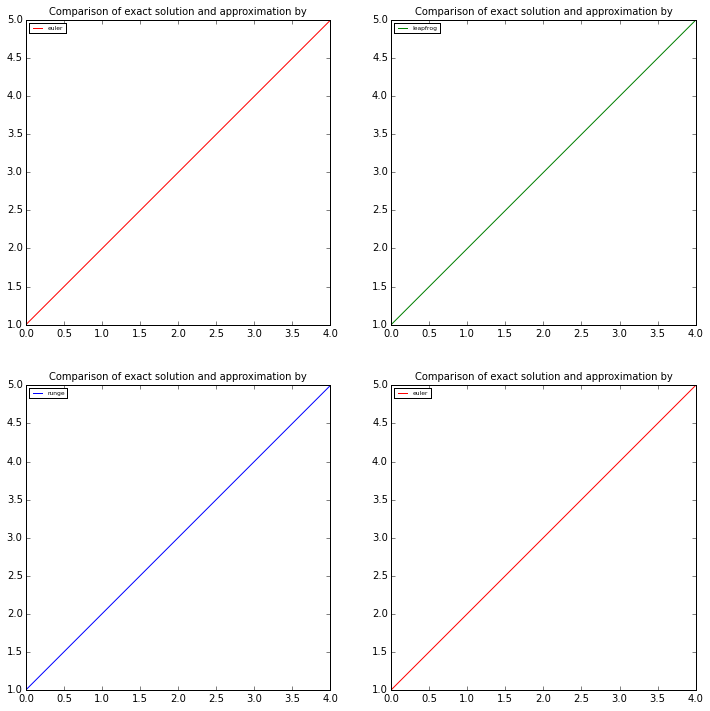

In [31]:
fig, big_axes = plt.subplots( figsize=(12.0, 12.0) , nrows=3, ncols=1, sharey=True) 
for row, big_ax in enumerate(big_axes, start=1):
    big_ax.tick_params(labelcolor=(1.,1.,1., 0.0), top='off', bottom='off', left='off', right='off')
    # removes the white frame
    big_ax._frameon = False

#this way of doing things is silly but oh well I am not that good at python
    
for i in range(1,5):
  
    ax = fig.add_subplot(2,2,i)
    if i == 1:
        funChoice = 'euler'
        npts = 10
        color = 'r'
    elif i == 2:
        funChoice = 'leapfrog'
        npts = 10
        color = 'g'
    elif i == 3:
        funChoice = 'runge'
        npts = 10
        color = 'b'    
    elif i == 4:
        funChoice = 'euler'
        npts = 50
        color = 'r'

        
    approxTime =[0,1,2,3,4]
    approxTemp =[1,2,3,4,5]
    ax.plot(approxTime,approxTemp, color, label = funChoice)
    ax.hold(True)
    titl =  "Comparison of exact solution and approximation by"
    ax.set_title(titl, fontsize = 10)
    ax.legend(loc=2,prop={'size':6})

fig.set_facecolor('w')
plt.show()